<a href="https://colab.research.google.com/github/PaulAlexInc/Cervical-Cancer-DataSet/blob/main/CervicalCancerLogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reading the cleaned dataset



In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support # gives the precision, recall and fscore, all at once
from pickle import dump # helps us to dump or save these models and scalers

In [ ]:
data=pd.read_csv("CervicalCancer_Cleaned")
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,False,0.0,0.0,False,0.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False,False,False,False
1,15.0,1.0,14.0,1.0,False,0.0,0.0,False,0.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False,False,False,False
2,34.0,1.0,25.0,1.0,False,0.0,0.0,False,0.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False,False,False,False
3,52.0,5.0,16.0,4.0,True,37.0,37.0,True,3.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,True,False,True,False,False,False,False,False
4,46.0,3.0,21.0,4.0,False,0.0,0.0,True,15.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False,False,False,False


In [ ]:
data.shape

(858, 32)

What is our target variable??<br>

According to the website, these are the 4 target variables<br>

(bool) Hinselmann: target variable<br>
(bool) Schiller: target variable<br>
(bool) Cytology: target variable<br>
(bool) Biopsy: target variable<br>

Let us consider one of these as our target variable now<br>

We'll consider Biopsy as our target variable which has two categories 0 and 1, where 1 represents that the woman has cancer and 0 represents that the woman does not have cancer<br>




At this point what if we wanted to use all these variables as our target variables, what if we wanted to predict the categories of all these 4 variables??<br>

What could we have done in that case?<br>
What we could have done is, we could have used a 1 vs rest classifier:<br> 
We have 4 target variables:<br>
(bool) Hinselmann: target variable<br>
(bool) Schiller: target variable<br>
(bool) Cytology: target variable<br>
(bool) Biopsy: target variable<br>

What the 1 vs rest classifier would do is that, consider (bool) Hinselmann: target variable as 1 class and the rest of the variables as the restr of the variables as another class, apply logistic regression and then give the output<br>

In the second case when it is predicting the output for (bool) Schiller: target variable, what it will do is consider this particular variable as 1 class and the other 3 as another class and give the output<br>

So it fits in our definition of logistic regression of giving binary output or binary classes.<br>

So just for our purpose, we'll only consider biopsy as our target variable, so we can remove the other three<br>


In [ ]:
data.columns

Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [ ]:
data.drop(['Hinselmann', 'Schiller',
       'Citology'], axis =1, inplace=True)



In [ ]:
data.shape

(858, 29)

## Preprocessing

## Data Encoding

In [ ]:
for uni in data.columns:
  print(uni)
  print(data[uni].unique())

Age
[18. 15. 34. 52. 46. 42. 51. 26. 45. 44. 27. 43. 40. 41. 39. 37. 38. 36.
 35. 33. 31. 32. 30. 23. 28. 29. 20. 25. 21. 24. 22. 48. 19. 17. 16. 14.
 59. 79. 84. 47. 13. 70. 50. 49.]
Number of sexual partners
[ 4.  1.  5.  3.  2.  6. 25.  7. 15.  8. 10. 28.  9.]
First sexual intercourse
[15. 14. 25. 16. 21. 23. 17. 26. 20. 18. 27. 19. 24. 32. 13. 29. 11. 12.
 22. 28. 10.]
Num of pregnancies
[ 1.  4.  2.  6.  3.  5. 25.  8.  7.  0. 11. 10.]
Smokes
[False  True]
Smokes (years)
[ 0.         37.         34.          1.26697291  3.         12.
 25.         18.          7.         19.         21.         15.
 13.         16.          8.          4.         10.         22.
 14.          0.5        11.          9.          2.          5.
  6.          1.         32.         24.         28.         20.
  0.16      ]
Smokes (packs/year)
[0.00000000e+00 3.70000000e+01 3.40000000e+00 2.80000000e+00
 4.00000000e-02 5.13202128e-01 2.40000000e+00 6.00000000e+00
 2.50000000e+01 9.00000000e+00 1.60000

Although data encoding is a step that we follow in machine learning schema, it might not always be necessary, it depends on our dataset and depending on our dataset, we may not need to perform data encoding.<br>

Here all categorical values have only true and false values. Since no multiple categories are present, we need not perform encoding<br> 

## Distribution of classes in the target variable

Check whether the distribution is a case of balanced or imbalanced classification

In [ ]:
data['Biopsy'].value_counts() # gives the count of the two classes that are present

False    803
True      55
Name: Biopsy, dtype: int64

Out of 858 rows of data, 55 belong to the class true and 803 belong to the class false 

Another way of giving this information is through a visualisation, or a plot

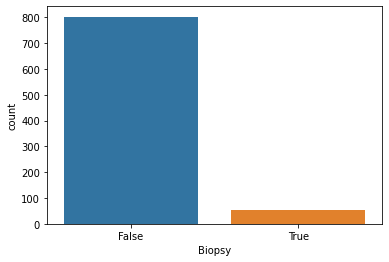

In [ ]:
sns.countplot(data=data, x='Biopsy')

This is a case of IMBALANCED classification

In [ ]:
803/(803+55)

0.9358974358974359

Almost 94% of the data belongs to class false whereas only 6% belongs to the class true

## Making the predictor and target variables

In [ ]:
x=data.drop(['Biopsy'], axis =1)
y=data['Biopsy']

In [ ]:
# printing the shape of predictor and target variables
print(x.shape)
print(y.shape)

(858, 28)
(858,)


In [ ]:
x.iloc[0].values.astype('float')

AttributeError: ignored

# Data Scaling


we don't have to scale the target variable since it is categorical in nature.<br>
Do we have to scale the categorical predictor variables? Yes, we do have to scale them.How it works is that all the true values get scaled to one value, say, A and all the false values get scaled down to one specific value B. So whenever the  variable takes the value true, A will be present, whenever the variable takes the value false, B will be present.<br>
So in classification cases we only scale the predictor dataframe and not the target dataframe

In [ ]:
scaler_x=StandardScaler().fit(x)


In [ ]:
x=scaler.transform(x)

In [ ]:
dump(scaler_x, open('scaler_x_logreg.pkl','wb'))

In [ ]:
x[0]

array([-1.03856336,  0.18899462, -0.71507369, -0.47691956, -0.4090806 ,
       -0.3167311 , -0.22155443, -1.47972669, -0.61501755, -0.32725643,
       -0.44840262, -0.31845261, -0.39430742, -0.23249528, -0.06843859,
       -0.22969705, -0.14638501, -0.03415935, -0.03415935, -0.03415935,
       -0.14638501, -0.03415935, -0.04833682, -0.28909302, -0.14638501,
       -0.10295973, -0.14638501, -0.16963779])

# Data Splitting

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# check the distribution of classes in the train and test set and check whether it stays more or less same or comparatable to thr entire data or not

In [ ]:
y_train.value_counts()

False    560
True      40
Name: Biopsy, dtype: int64

In [ ]:
560/(560+40)

0.9333333333333333

In the training set 93% of the data belongs to class false and 7% to true which is approximately the same as the previous case(i.e the distribution of the entire dataset)

In [ ]:
# distribution in the test set
y_test.value_counts()

False    243
True      15
Name: Biopsy, dtype: int64

In [ ]:
243/(243+15)

0.9418604651162791

We again get 94% and 6% so this should happen, we need to keep a check that the distribution of the two classes stays approximately the same in the train and the test set, it should not happen that in the original datset the ratio was 94 : 6 and in the test dataset it is 97:3, that will lead to errors

#Baseline model

If we have a no classification model or a model that predicts all the values to belong to the class False, even then what is the classifcation that we get.

Baseline model doesn't have relevance in case of an imbalanced classification because accuracy is not a measure in such cases.<br>

The usual way of defining a baseline model is to consider a model which predicts the value to be equal to the majority class<br>

Here, in the training dataset, the two classes, majority and minority (-ve and positive) are present in the ratio of 93:7. So, the baseline model in this case is 93% because when it predicts all values to belong to the negative class, it still makes 93% correct predictions owing to the class distribution.


# Logistic Regression with all the variables

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
#checking the probability
model1.predict_proba(x_test)

array([[9.46989260e-01, 5.30107396e-02],
       [9.44387917e-01, 5.56120832e-02],
       [9.25662650e-01, 7.43373495e-02],
       [9.52709923e-01, 4.72900775e-02],
       [9.70752730e-01, 2.92472697e-02],
       [9.00056615e-01, 9.99433853e-02],
       [9.48024483e-01, 5.19755170e-02],
       [9.54814652e-01, 4.51853476e-02],
       [9.44198200e-01, 5.58017995e-02],
       [9.99228383e-01, 7.71616638e-04],
       [9.54450853e-01, 4.55491474e-02],
       [9.45724619e-01, 5.42753810e-02],
       [9.34336461e-01, 6.56635385e-02],
       [9.01757610e-01, 9.82423899e-02],
       [9.25400363e-01, 7.45996375e-02],
       [9.35908267e-01, 6.40917332e-02],
       [9.46388616e-01, 5.36113845e-02],
       [9.44153096e-01, 5.58469040e-02],
       [9.60278567e-01, 3.97214327e-02],
       [9.52074371e-01, 4.79256292e-02],
       [9.48589332e-01, 5.14106677e-02],
       [9.87055510e-01, 1.29444900e-02],
       [9.85492091e-01, 1.45079093e-02],
       [9.42062943e-01, 5.79370568e-02],
       [9.478648

In [ ]:
confusion_matrix(y_test, y_pred)

array([[242,   1],
       [ 14,   1]])

The diagonals are basically the total number of correct predictions and as we can see that for the false class 242 predictions were correct and for the true class only one prediction was correct, in the actual distribution, we had 243 false values and 15 true values, so we can see that out of 243 false values our model has correctly categorised 242 values, but out of 15 true values it was able to correctly classify only 1 value, so this is not a good model. 

In [ ]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.9453125, 0.5      ]),
 array([0.99588477, 0.06666667]),
 array([0.96993988, 0.11764706]),
 array([243,  15]))

Look at the second value(0.5), basically what these values are wrt the two classes<br>

- 0.9453125 is the precision for class false
- 0.5 is the precision for class true
- 0.99588477 is the recall for class false
- 0.06666667 is the recall for class true
- 0.96993988 is the fscore for class false
- 0.11764706 is the fscore for class true

So we can again see in this case, that all the values corresponding to the value true are low and hence we need a better model.

Now that we created our first basic model, we need to improve it or finetune it

## Fine Tuning the model

Now what we try to do is we will try to modify the logistic regression algorithm in such a way that the model penalises more when the class true predictions are wrong, basically if we go back and check<br>
array([[242,   1],<br>
       [ 14,   1]])<br>

Here, out of 15, 14 predictions were wrong, so what will happen is that for these cases the model will be penalised more and hence what it will do is that it will start learning ways to classify the class true correctly and we do it using the weight parameter of the logistic regression function  

We'll make a logistic regression model and we'll use the class weight method, basically what we want the weight of the classes to be, here we want the class 0 or class false to have a lesser weight and the class 1 or the class true to have a higher weight because class true is the one that is getting wrongly classified, so the weights are usually selected as the inverse of the actual class distribution of the training dataset. It means that in the training dataset, if the distribution is 93:7 for class 0 and class 1, while giving weight, class 0 (majority class) will get a weight of 7 or 0.07 and the minority class or the class true will get the weight of the majority class percentage or 0.93.

## Model 2

In [ ]:
model2 = LogisticRegression(class_weight={0:7, 1:93})
#class_weight={0:7, 1:93}, class 0 gets a weight of 7 and class 1 gets a weight of 93 i.e a higher percentage,    

In [ ]:
model2.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 7, 1: 93}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
dump(model2, open('model_logreg.pkl','wb'))

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
x_test.shape

(258, 28)

In [ ]:
y_pred

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [ ]:
model2.predict_proba(x_test)

array([[6.71648394e-01, 3.28351606e-01],
       [6.18051891e-01, 3.81948109e-01],
       [4.31603178e-01, 5.68396822e-01],
       [6.08560642e-01, 3.91439358e-01],
       [7.44523083e-01, 2.55476917e-01],
       [3.14145368e-01, 6.85854632e-01],
       [6.63407123e-01, 3.36592877e-01],
       [6.84600581e-01, 3.15399419e-01],
       [5.55723107e-01, 4.44276893e-01],
       [9.99811039e-01, 1.88960537e-04],
       [6.75730984e-01, 3.24269016e-01],
       [6.30816731e-01, 3.69183269e-01],
       [4.46451707e-01, 5.53548293e-01],
       [3.12663028e-01, 6.87336972e-01],
       [3.83502742e-01, 6.16497258e-01],
       [5.32821609e-01, 4.67178391e-01],
       [6.50972864e-01, 3.49027136e-01],
       [6.36749769e-01, 3.63250231e-01],
       [6.73861164e-01, 3.26138836e-01],
       [6.16590717e-01, 3.83409283e-01],
       [6.54741669e-01, 3.45258331e-01],
       [9.21109299e-01, 7.88907012e-02],
       [9.04977782e-01, 9.50222181e-02],
       [5.19198015e-01, 4.80801985e-01],
       [5.682661

In [ ]:
confusion_matrix(y_test, y_pred)

array([[199,  44],
       [  8,   7]])

Previously we had 242 correct predictions for class 0, now it has reduced to 199, but for class 1(class true) initially there was only 1 correct prediction, but now there are 7, so it has basically increased 7 times. There are some incorrect predictions also in class 0, for example there are 44 false values which have been incorrectly predicted as true, so what we can see from here is that {0:7, 1:93} is not the most optimum class weight, we will again have to try different weights maybe 10 and 90, etc, its basically trial and error 

In [ ]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.96135266, 0.1372549 ]),
 array([0.81893004, 0.46666667]),
 array([0.88444444, 0.21212121]),
 array([243,  15]))

Compared to the previous case, there is a considerable increase in the score for class true, for the class true, the precision is 0.1372549, recall is 0.46666667 and fscore is 0.21212121, so there is still scope for more improvement, but now we have been able to improve our first model which offered no classification at all. Wecan now try different ways to improve it further, change the scaler, try out min max scaler, etc. 